## Movie Recommendation System Using TF_IDF

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt



In [202]:
movies_df = pd.read_csv("tmdb_5000_movies.csv")
movies_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [203]:
import json 

def get_keywords_document(value):
    genres = json.loads(value["genres"])
    keywords = json.loads(value["keywords"])
    return ' '.join([x["name"] for x in genres + keywords])
    
    # print(value["genres"],value["keywords"])
movies_df['genres_keyword'] = movies_df[["genres","keywords"]].apply(get_keywords_document,axis=1)

In [204]:
movies_df["genres_keyword"]

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states–mexico bar...
4799                                       Comedy Romance
4800    Comedy Drama Romance TV Movie date love at fir...
4801                                                     
4802     Documentary obsession camcorder crush dream girl
Name: genres_keyword, Length: 4803, dtype: object

In [ ]:
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(movies_df["genres_keyword"])
X

<4803x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 54750 stored elements in Compressed Sparse Row format>

In [206]:
# index mapping using movie title 
moviesIdx = pd.Series(
    movies_df.index,
    index=movies_df["title"]
)

In [207]:
moviesIdx.head()

title
Avatar                                      0
Pirates of the Caribbean: At World's End    1
Spectre                                     2
The Dark Knight Rises                       3
John Carter                                 4
dtype: int64

In [ ]:
query = X[moviesIdx["Avatar"]]

In [252]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_movies = cosine_similarity(query,X)

In [254]:
similarity_movies = similarity_movies.flatten()

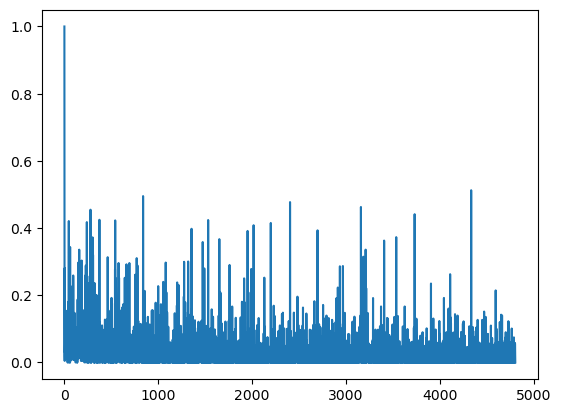

In [257]:
plt.plot(similarity_movies)

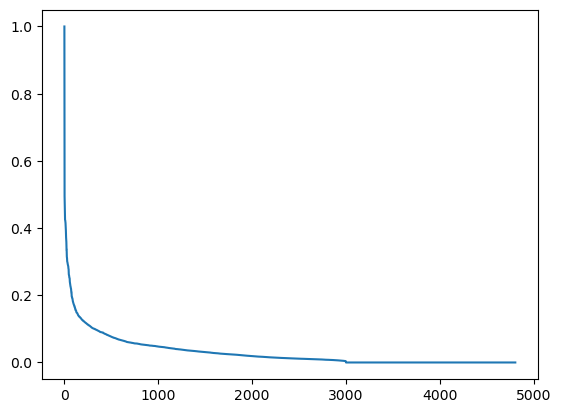

In [269]:
plt.plot(similarity_movies[(-similarity_movies).argsort()])

In [287]:
moviesIdx

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [293]:
movies_df["title"][0]

'Avatar'